# Multiple Linear Regression

**1. Loading and exploring data:**

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('/content/cars.csv')
df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5076 entries, 0 to 5075
Data columns (total 18 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Dimensions.Height                                5076 non-null   int64 
 1   Dimensions.Length                                5076 non-null   int64 
 2   Dimensions.Width                                 5076 non-null   int64 
 3   Engine Information.Driveline                     5076 non-null   object
 4   Engine Information.Engine Type                   5076 non-null   object
 5   Engine Information.Hybrid                        5076 non-null   bool  
 6   Engine Information.Number of Forward Gears       5076 non-null   int64 
 7   Engine Information.Transmission                  5076 non-null   object
 8   Fuel Information.City mpg                        5076 non-null   int64 
 9   Fuel Information.Fuel Type               

In [4]:
df.describe()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
count,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000
mean,145.632191,127.825847,144.012411,5.519110,17.275808,24.125493,2010.867612,270.499409,272.707250
std,62.125026,77.358295,79.925899,0.845637,4.479485,6.488293,0.782951,95.293537,100.123328
min,1.000000,2.000000,1.000000,4.000000,8.000000,11.000000,2009.000000,100.000000,98.000000
25%,104.000000,60.000000,62.000000,5.000000,14.000000,20.000000,2010.000000,190.000000,187.000000
50%,152.000000,128.000000,158.000000,6.000000,17.000000,24.000000,2011.000000,266.000000,260.000000
75%,193.000000,198.000000,219.000000,6.000000,20.000000,28.000000,2011.000000,317.000000,335.000000
max,255.000000,255.000000,254.000000,8.000000,38.000000,223.000000,2012.000000,638.000000,774.000000


Rows & Columns: 5,076 entries, 18 columns.

Numeric Features: Dimensions (Height, Length, Width), Number of Forward Gears,
City & Highway MPG, Horsepower, Torque, Year.

Categorical Features: Driveline, Engine Type, Transmission, Fuel Type, Classification, Make, Model Year, ID.

Potential Target Variables: City MPG, Highway MPG, or Horsepower.


**2. Handle missing and unique values:**

In [5]:
# Check for missing values
missing_values = df.isnull().sum()

missing_values

,0
Dimensions.Height,0
Dimensions.Length,0
Dimensions.Width,0
Engine Information.Driveline,0
Engine Information.Engine Type,0
Engine Information.Hybrid,0
Engine Information.Number of Forward Gears,0
Engine Information.Transmission,0
Fuel Information.City mpg,0
Fuel Information.Fuel Type,0


In [6]:
# Check unique values in categorical columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
unique_values = {col: df[col].nunique() for col in categorical_cols}

unique_values

{'Engine Information.Driveline': 4,
 'Engine Information.Engine Type': 535,
 'Engine Information.Hybrid': 1,
 'Engine Information.Transmission': 11,
 'Fuel Information.Fuel Type': 4,
 'Identification.Classification': 2,
 'Identification.ID': 5030,
 'Identification.Make': 47,
 'Identification.Model Year': 918}

Missing values: None

Categorical variables with high cardinalities: Engine Information.Engine Type(535), Identification.ID(5030), Identification.Model Year(918)


**3. Handle Duplicate rows:**

In [7]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
duplicate_rows

18

In [8]:
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)

**4. Encode Categorical Variables:**

In [9]:
# Dropping ID and Model Year since they are the mostly unique identifiers
df_cleaned = df.drop(columns=["Identification.ID", "Identification.Model Year"])

# One-hot encode categorical variables with low cardinality
cols_to_encode = ["Engine Information.Driveline", "Engine Information.Transmission",
                              "Fuel Information.Fuel Type", "Identification.Classification"]

df_encoded = pd.get_dummies(df_cleaned, columns=cols_to_encode, drop_first=True)

# Display the first few rows after encoding
df_encoded.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Make,Identification.Year,...,Engine Information.Transmission_6 Speed Automatic,Engine Information.Transmission_6 Speed Automatic Select Shift,Engine Information.Transmission_6 Speed Manual,Engine Information.Transmission_7 Speed Automatic,Engine Information.Transmission_7 Speed Automatic Select Shift,Engine Information.Transmission_8 Speed Automatic Select Shift,Fuel Information.Fuel Type_Diesel fuel,Fuel Information.Fuel Type_E85,Fuel Information.Fuel Type_Gasoline,Identification.Classification_Manual transmission
0,140,143,202,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,18,25,Audi,2009,...,False,True,False,False,False,False,False,False,True,False
1,140,143,202,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,22,28,Audi,2009,...,False,True,False,False,False,False,False,False,True,False
2,140,143,202,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,21,30,Audi,2009,...,False,False,True,False,False,False,False,False,True,True
3,140,143,202,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,21,28,Audi,2009,...,False,True,False,False,False,False,False,False,True,False
4,91,17,62,Audi 3.2L 6 cylinder 265hp 243 ft-lbs,True,6,16,27,Audi,2009,...,False,False,True,False,False,False,False,False,True,True


In [10]:
# Identify columns with object (string) data types
categorical_cols = df_encoded.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['Engine Information.Engine Type', 'Identification.Make'], dtype='object')


In [11]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to all categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Store encoders for reference

print("Categorical columns successfully encoded.")

Categorical columns successfully encoded.


**5. Feature Selection:**

Possible Target Variables: Fuel Information.City mpg, Fuel Information.Highway mpg, Engine Information.Engine Statistics.Horsepower.

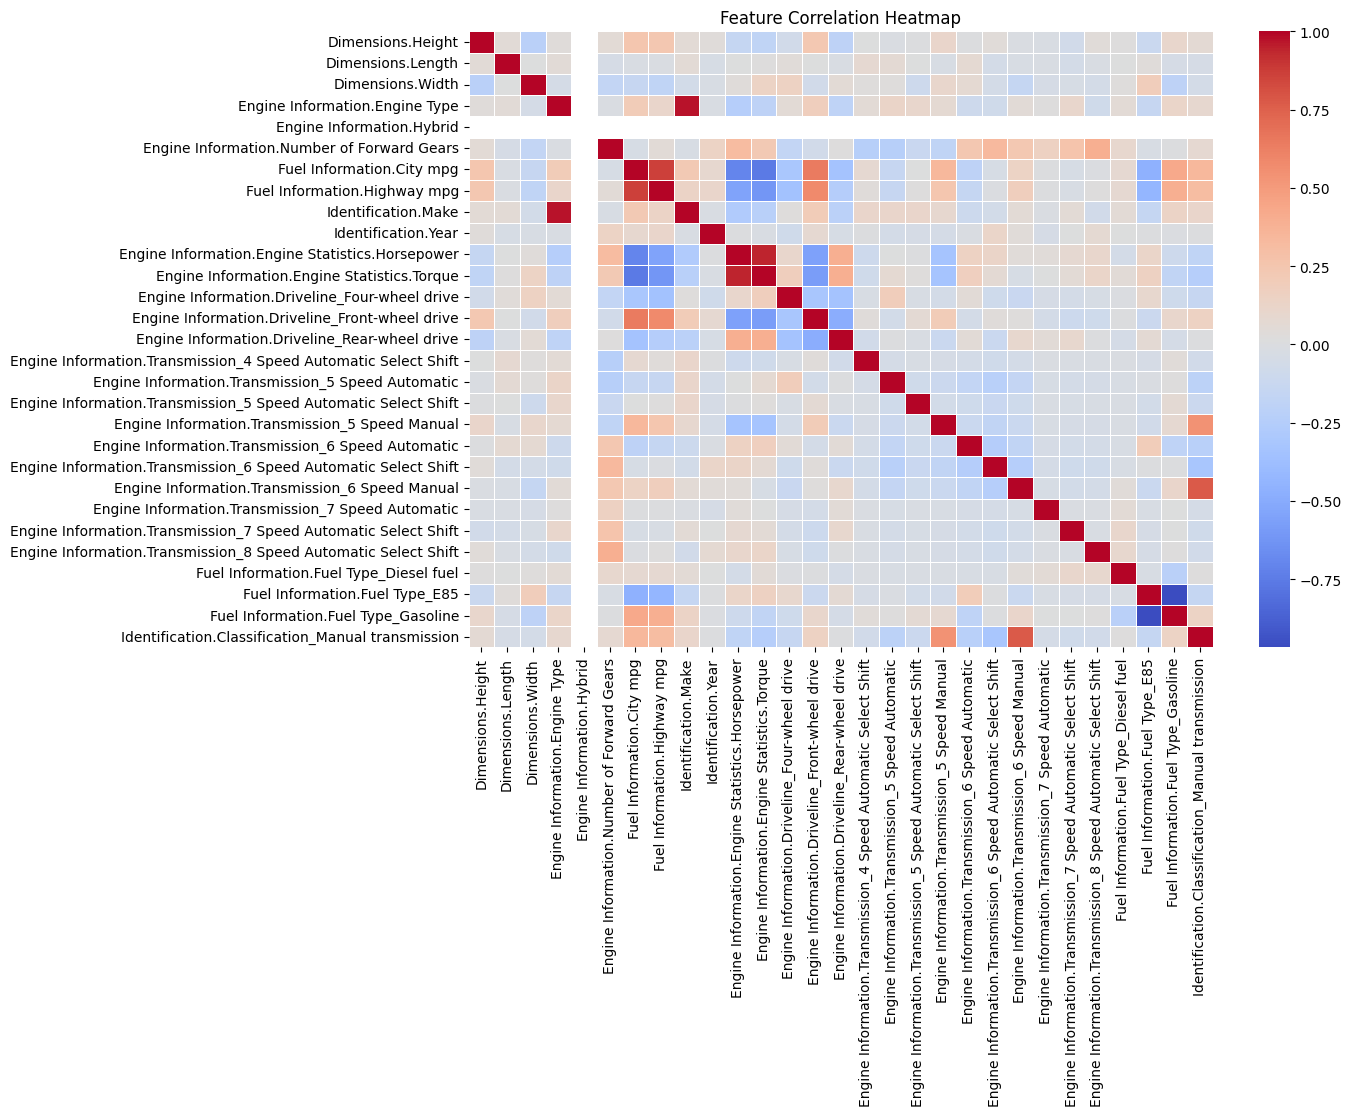

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

*From the heat map we can identify strongly correlated variables:*

Fuel Information.City mpg and Fuel Information.Highway mpg

Engine Information.Engine Statistics.Horsepower and Engine Information.Engine Statistics.Torque

**Selected Target variable:** Fuel Information.Highway mpg

**6. Feature Scaling:**

In [13]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical features for scaling
numerical_features = [
    "Engine Information.Engine Statistics.Horsepower",
    "Engine Information.Engine Statistics.Torque",
    "Dimensions.Height",
    "Dimensions.Length",
    "Dimensions.Width",
    "Engine Information.Number of Forward Gears",
    "Fuel Information.City mpg",
    "Fuel Information.Highway mpg",
    "Identification.Year"
]

# Applying StandardScaler (Z-score normalization)
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the first few rows of the scaled dataset
df_scaled.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,-0.091327,0.196527,0.727342,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,0.568546,6 Speed Automatic Select Shift,0.161624,Gasoline,0.134330,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,-2.386149,-0.215680,-0.366326
1,-0.091327,0.196527,0.727342,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,0.568546,6 Speed Automatic Select Shift,1.053843,Gasoline,0.596221,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,-2.386149,-0.740212,-0.655932
2,-0.091327,0.196527,0.727342,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,0.568546,6 Speed Manual,0.830788,Gasoline,0.904148,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,-2.386149,-0.740212,-0.655932
3,-0.091327,0.196527,0.727342,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,0.568546,6 Speed Automatic Select Shift,0.830788,Gasoline,0.596221,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,-2.386149,-0.740212,-0.655932
4,-0.879249,-1.432955,-1.023792,All-wheel drive,Audi 3.2L 6 cylinder 265hp 243 ft-lbs,True,0.568546,6 Speed Manual,-0.284485,Gasoline,0.442257,Manual transmission,2009 Audi A5 3.2,Audi,2009 Audi A5,-2.386149,-0.058321,-0.296421


**7. Handling Outliers:**

In [14]:
import numpy as np

# Define numerical features
numerical_features = [
    "Engine Information.Engine Statistics.Horsepower",
    "Engine Information.Engine Statistics.Torque",
    "Dimensions.Height",
    "Dimensions.Length",
    "Dimensions.Width",
    "Engine Information.Number of Forward Gears",
    "Fuel Information.City mpg",
    "Fuel Information.Highway mpg",
    "Identification.Year"
]

# Remove outliers using IQR method
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[~((df[numerical_features] < (Q1 - 1.5 * IQR)) |
                      (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Compare dataset size before and after outlier removal
print("Original dataset shape:", df.shape)
print("Dataset shape after outlier removal:", df_no_outliers.shape)

Original dataset shape: (5058, 18)
Dataset shape after outlier removal: (4806, 18)


**8. Data splitting:**

In [15]:
from sklearn.model_selection import train_test_split

# Define target variable
target = "Fuel Information.Highway mpg"

# Define features (excluding the target variable)
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4046, 28), (1012, 28), (4046,), (1012,))

Training Set: 4,060 samples

Testing Set: 1,016 samples

Feature Count: 28

**9. Building the Multiple linear regression model:**

In [16]:
#building multiple linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

**10. Evaluating Model Performance:**

In [18]:
# Model Evaluation
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display evaluation metrics
(train_mae, test_mae, train_rmse, test_rmse, train_r2, test_r2)

(1.1223376269526322,
 1.0700377152063751,
 3.377295639803245,
 1.4415055052790289,
 0.7405801887103967,
 0.9407319142977546)

**11. Check assumptions of Linear Regression:**

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

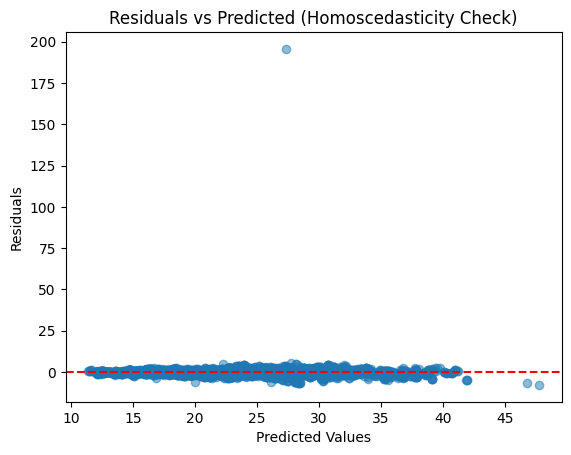

In [20]:
# --- HOMOSCEDASTICITY CHECK ---
plt.scatter(y_train_pred, train_residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Homoscedasticity Check)")
plt.show()

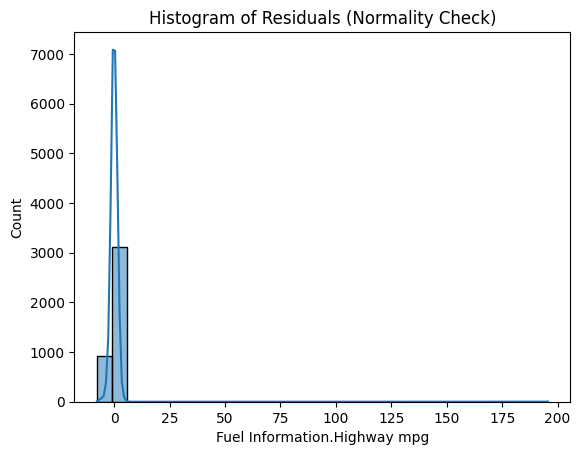

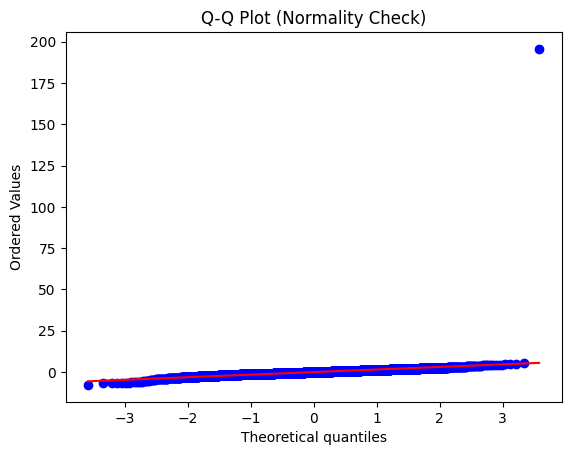

In [21]:
# --- NORMALITY CHECK ---
sns.histplot(train_residuals, kde=True, bins=30)
plt.title("Histogram of Residuals (Normality Check)")
plt.show()

stats.probplot(train_residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot (Normality Check)")
plt.show()

**12. Visulaizations:**

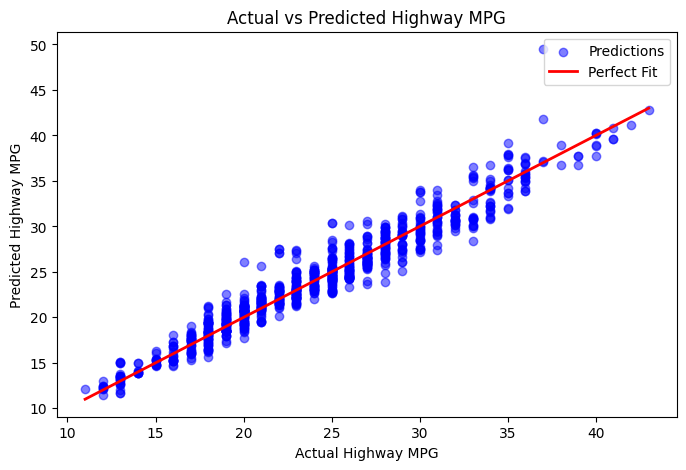

In [22]:
#actual vs predicted plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2, label="Perfect Fit")  # 45-degree line
plt.xlabel("Actual Highway MPG")
plt.ylabel("Predicted Highway MPG")
plt.title("Actual vs Predicted Highway MPG")
plt.legend()
plt.show()

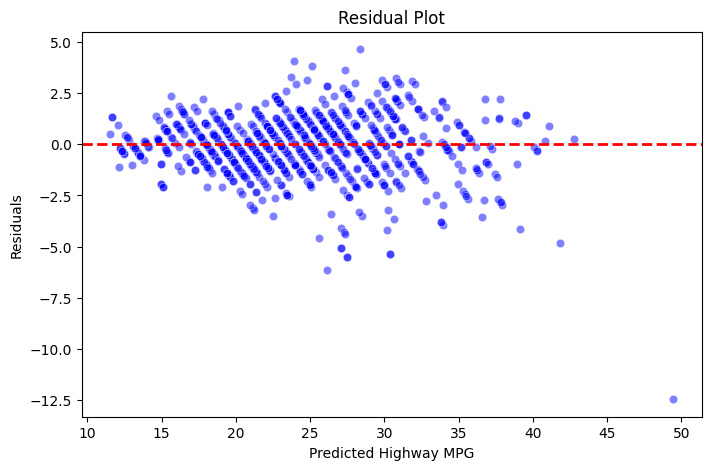

In [23]:
#Residual plot
import seaborn as sns

residuals = y_test - y_test_pred  # Compute residuals

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='red', linestyle='--', lw=2)  # Zero line
plt.xlabel("Predicted Highway MPG")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

**Final Model Evaluation:**

Mean Absolute Error (MAE)-
Training Set: 1.1223,
Test Set: 1.0700

Mean Squared Error(MSE)-
Training Set: 3.3773,
Test Set: 1.4415

Root Mean Squared Error (RMSE)-
Training Set: 3.3773,
Test Set: 1.4415

R² Score-
Training Set: 0.7406,
Test Set: 0.9407

***The R² score of 0.94 on the test set suggests that the model explains 94% of the variance in the target variable (Fuel Information.Highway mpg).***

***The low RMSE on the test set indicates that predictions are relatively close to actual values, suggesting a well-fitting model.***

***The model seems to generalize well, as the test R² is higher than the training R², which might indicate that the model performs slightly better on unseen data.***